In [1]:
import pandas as pd
import os 
import sys 
dir_path = os.getcwd()
path_part = os.path.dirname(dir_path)
years = [2020, 2021, 2022]
scenario_name="20240220_Mierendorff"
renovations_status= [ 0 , 1, 2]

In [2]:
# Create a scenario from the GML file 
# data\examples\gml_data\Block020023.gml 
dir_path = os.getcwd()
path_part = os.path.dirname(dir_path)
model_path = os.path.join(path_part, r'data\model_sheets')
mierendorf_path = os.path.join(path_part, r'data\examples\gml_data\Block020023.gml')
print(mierendorf_path)
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src\\citygml")

from sheet_generation import create_sheet
from scenario_generation import create_scenario, set_yoc
from gml_alkis import get_block, get_groundsurfes

c:\Users\felix\Programmieren\tecdm\data\examples\gml_data\Block020023.gml


In [3]:
# create all scenarios
df = create_sheet(mierendorf_path)
model_mierendorff = os.path.join(model_path, r'Block020023.csv')
df.to_csv(model_mierendorff)
scenarios = []
for renovation_status in renovations_status: 
    scenario_name = f"Block020023_{renovation_status}"
    scenario_path = create_scenario(model_mierendorff, scenario_name=scenario_name, default_building_type="AB")
    set_yoc(scenario_path, yoc=1955, retrofit=renovation_status) 
    scenarios.append(scenario_name)

[<Element {http://www.opengis.net/citygml/building/2.0}Building at 0x1e84eb66d40>, <Element {http://www.opengis.net/citygml/building/2.0}Building at 0x1e84edf4700>, <Element {http://www.opengis.net/citygml/building/2.0}Building at 0x1e84edf4580>, <Element {http://www.opengis.net/citygml/building/2.0}Building at 0x1e84edfcc40>]
[<Element {http://www.opengis.net/citygml/building/2.0}Building at 0x1e84de0bbc0>, <Element {http://www.opengis.net/citygml/building/2.0}Building at 0x1e84ee49940>, <Element {http://www.opengis.net/citygml/building/2.0}Building at 0x1e84ee43580>, <Element {http://www.opengis.net/citygml/building/2.0}Building at 0x1e84edd26c0>]


In [4]:
# Set up district generator 
from districtgenerator.datahandler import Datahandler

In [5]:
for scenario in scenarios:
    for year in years: 
        # Set epw 2020 weather File 
        weather_file = os.path.join(path_part, 'data', 'examples' , 'weather_data' ,f'AMY_2010_2022_{year}.epw')
        partial_mierendorff = Datahandler()
        partial_mierendorff.setWeatherFile(weather_file)
        partial_mierendorff.initializeBuildings(scenario_name=scenario)
        partial_mierendorff.generateEnvironment()
        result_path = os.path.join(path_part, 'data', 'partial' ,str(year))
        partial_mierendorff.setResultPath(result_path)
        partial_mierendorff.generateBuildings()
        partial_mierendorff.generateDemands(savePath=scenario)

Calculate demands of building AB_18_0
c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023_0
Save heating profile of building AB_18_0 in c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023_0
Calculate demands of building AB_13_0
c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023_0
Save heating profile of building AB_13_0 in c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023_0
Calculate demands of building MFH_7_0
c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023_0
Save heating profile of building MFH_7_0 in c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023_0
Calculate demands of building AB_61_0
c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023_0
Save heating profile of building AB_61_0 in c:\Users\felix\Programmieren\tecdm\data\partial\2020\results\demands\Block020023_0
Finished

In [6]:
partial_mierendorff.time["timeResolution"]  

3600

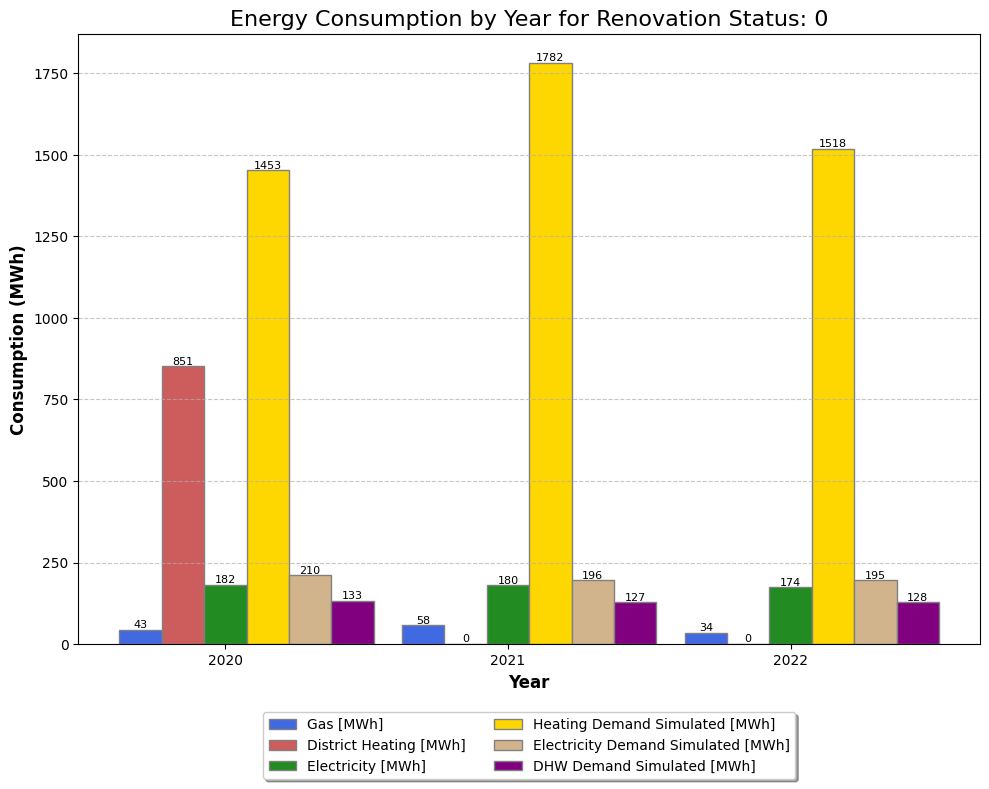

c:\Users\felix\Programmieren\tecdm\data\results\plots\Block020023_0


<Figure size 640x480 with 0 Axes>

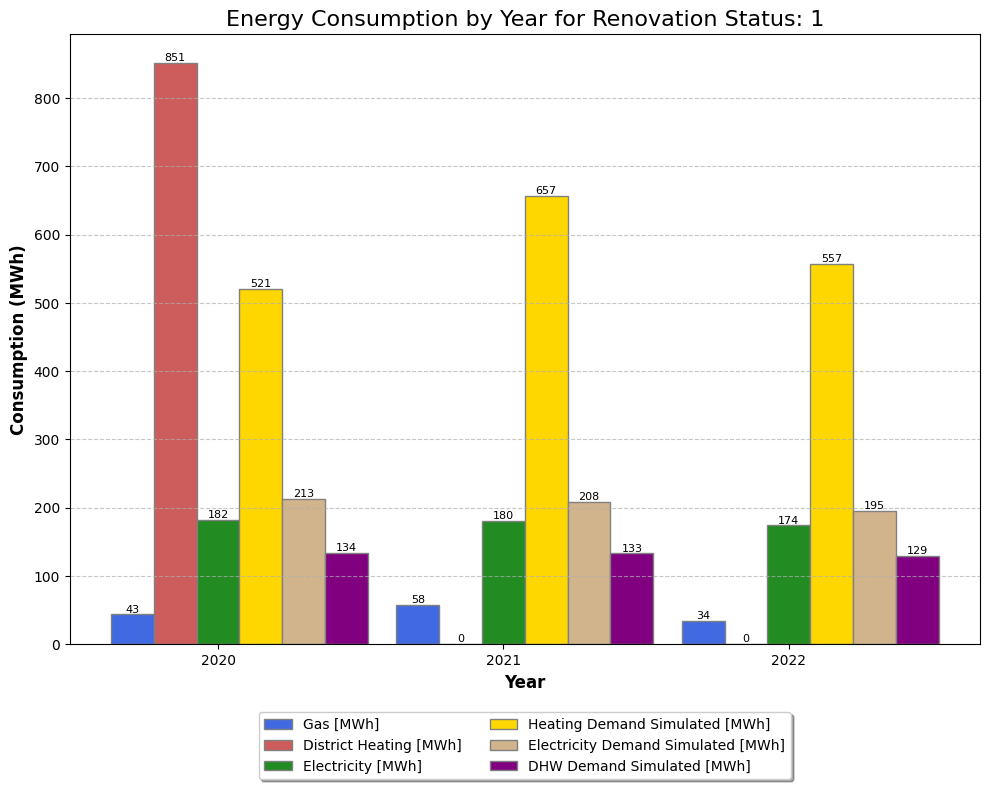

c:\Users\felix\Programmieren\tecdm\data\results\plots\Block020023_1


<Figure size 640x480 with 0 Axes>

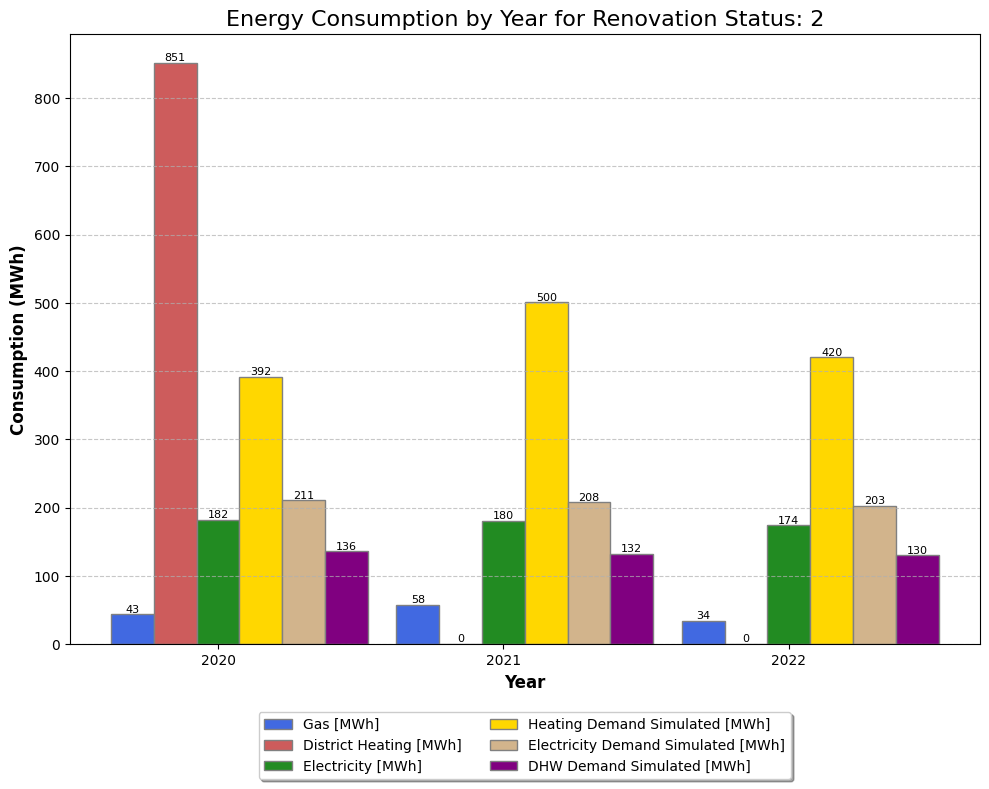

c:\Users\felix\Programmieren\tecdm\data\results\plots\Block020023_2


<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Get real data for comparison
# Block: 20023 
gas_path = os.path.join(path_part, 'data', 'berlin', 'Gas_Berlin_2020_2022.xls')
gas_data = pd.read_excel(gas_path)
gas_data_filtered = gas_data[gas_data["Blocknummer"] == 20023]
gas_mwhyr = {
    2020: gas_data_filtered["Gasverbrauch 2020 [MWh]"].item(),
    2021 : gas_data_filtered["Gasverbrauch 2021 [MWh]"].item(),
    2022: gas_data_filtered["Gasverbrauch 2022 [MWh]"].item()
}
elec_path = os.path.join(path_part, 'data', 'berlin', 'Elec_Berlin_2020_2022.xls')
elec_data = pd.read_excel(elec_path)
elec_data_filtered = elec_data[elec_data["Blocknummer"] == 20023]
elec_mwhyr = {
    2020: elec_data_filtered["Stromverbrauch 2020 [MWh]"].item(),
    2021 : elec_data_filtered["Stromverbrauch 2021 [MWh]"].item(),
    2022: elec_data_filtered["Stromverbrauch 2022 [MWh]"].item()
}
elec_mwhyr

dh_path = os.path.join(path_part, 'data', 'berlin', 'DH_Berlin_2020_2022.xls')
dh_data = pd.read_excel(dh_path)
dh_data_filtered = dh_data[dh_data["Blocknummer"] == 20023]
dh_data_filtered = dh_data_filtered.replace('-', 0)
dh_mwhyr = {
    2020: dh_data_filtered["Fernwärmeverbrauch 2020 [MWh]"].item(),
    2021 : dh_data_filtered["Fernwärmeverbrauch 2021 [MWh]"].fillna(0).item(),
    2022: dh_data_filtered["Fernwärmeverbrauch 2022 [MWh]"].fillna(0).item()

} 


for renovation_status in renovations_status: 

        
    building_ids = ['AB_13_0', 'AB_18_0', 'AB_61_0', 'MFH_7_0']
    project_folder = os.path.dirname(os.getcwd())

    demand_dict = {
        "Electricity": {},
        "Heating": {},
        "DHW": {},
    }
    for year in [2020, 2021, 2022]:
        elec_demand = 0 
        heat_demand = 0
        DHW_demand = 0 
        results_path = os.path.join(project_folder, 'data', 'partial', str(year), 'results', 'demands', f'Block020023_{renovation_status}' )
        for building in building_ids:
            elec_file_path = os.path.join(results_path, f'elec_{building}.csv')
            elec_df = pd.read_csv(elec_file_path, names=["demand"])
            heat_file_path = os.path.join(results_path, f'heat_{building}.csv')
            heat_df = pd.read_csv(heat_file_path, names=["demand"])
            dhw_file_path = os.path.join(results_path, f'dhw_{building}.csv')
            dhw_df = pd.read_csv(dhw_file_path, names=["demand"])
            elec_demand = elec_demand + elec_df["demand"].sum()
            heat_demand = heat_demand + heat_df["demand"].sum()
            DHW_demand = DHW_demand + dhw_df["demand"].sum()
        # District generator provides output in Wh
        demand_dict["Electricity"][year] = elec_demand/1000000
        demand_dict["Heating"][year] = heat_demand/1000000
        demand_dict["DHW"][year] = DHW_demand/1000000


    # Assume the dictionaries 'gas_mwhyr', 'dh_mwhyr', 'elec_mwhyr' and 'data_dict' are already defined as in the original scenario.

    # Years for the x-axis
    years = list(gas_mwhyr.keys())

    # Values for the y-axis
    gas_values = list(gas_mwhyr.values())
    dh_values = list(dh_mwhyr.values())
    elec_values = list(elec_mwhyr.values())
    sim_heating = list(demand_dict["Heating"].values())
    sim_elec = list(demand_dict["Electricity"].values())
    sim_dhw = list(demand_dict["DHW"].values())

    # Set the width of the bars
    bar_width = 0.15  # Reduced width to introduce space between bars

    # Set the position of the bars on the x-axis
    r1 = np.arange(len(gas_values))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]
    r5 = [x + bar_width for x in r4]
    r6 = [x + bar_width for x in r5]

    # Make the plot
    plt.figure(figsize=(10, 8))  # Increased figure size
    plt.bar(r1, gas_values, color='royalblue', width=bar_width, edgecolor='grey', label='Gas [MWh]')
    plt.bar(r2, dh_values, color='indianred', width=bar_width, edgecolor='grey', label='District Heating [MWh]')
    plt.bar(r3, elec_values, color='forestgreen', width=bar_width, edgecolor='grey', label='Electricity [MWh]')
    plt.bar(r4, sim_heating, color='gold', width=bar_width, edgecolor='grey', label='Heating Demand Simulated [MWh]')
    plt.bar(r5, sim_elec, color='tan', width=bar_width, edgecolor='grey', label='Electricity Demand Simulated [MWh]')
    plt.bar(r6, sim_dhw, color="purple", width=bar_width, edgecolor='grey', label='DHW Demand Simulated [MWh]')

    # Add labels to the x-axis and y-axis
    plt.xlabel('Year', fontweight='bold', fontsize=12)
    plt.ylabel('Consumption (MWh)', fontweight='bold', fontsize=12)
    plt.xticks([r + bar_width*2 for r in range(len(gas_values))], years, fontsize=10)

    # Create legend & Show graphic
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
    plt.title(f'Energy Consumption by Year for Renovation Status: {renovation_status}', fontsize=16)

    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Optionally, add value labels on top of each bar
    for i in range(len(r1)):
        plt.text(r1[i], gas_values[i], str(round(gas_values[i])), ha='center', va='bottom', fontsize=8)
        plt.text(r2[i], dh_values[i], str(round(dh_values[i])), ha='center', va='bottom', fontsize=8)
        plt.text(r3[i], elec_values[i], str(round(elec_values[i])), ha='center', va='bottom', fontsize=8)
        plt.text(r4[i], sim_heating[i], str(round(sim_heating[i])), ha='center', va='bottom', fontsize=8)
        plt.text(r5[i], sim_elec[i], str(round(sim_elec[i])), ha='center', va='bottom', fontsize=8)
        plt.text(r6[i], sim_dhw[i], str(round(sim_dhw[i])), ha='center', va='bottom', fontsize=8)

    # Show graphic
    plt.tight_layout()  # Adjust the padding between and around subplots.
    plt.show()
    save_path = os.path.join(project_folder, 'data', 'results', 'plots', f'Block020023_{renovation_status}')
    print(save_path)
    plt.savefig(save_path)